In [1]:
import pandas as pd
import numpy as np
import csv
import pandas as pd
import numpy as np
from IPython.core.display import clear_output
import sys
reload(sys)
sys.setdefaultencoding('utf8')
import seaborn as sns
import matplotlib.pyplot as plt
import base64
import string
import re
from collections import Counter

In [2]:
import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words

In [4]:
train = pd.read_csv('liputan6news.csv')

In [6]:
train = train[['newsdesc','newstitle']]

In [9]:
train['titledesc'] = train[['newsdesc', 'newstitle']].apply(lambda x: ' '. join(x), axis=1)

In [10]:
train

,newsdesc,newstitle,titledesc
0,Kementerian PUPR masih menunggu Kementerian Ke...,"Harga Rumah Subsidi Bakal Naik hingga 7,75 Persen",Kementerian PUPR masih menunggu Kementerian Ke...
1,Mulai 21 Januari 2019 hingga dua bulan ke depa...,"Diskon 15 Persen, Tarif Tol Trans Jawa Jakarta...",Mulai 21 Januari 2019 hingga dua bulan ke depa...
2,Menteri Basuki menyaksikan masih banyak sampah...,Menteri Basuki Minta Warga Tak Buang Sampah di...,Menteri Basuki menyaksikan masih banyak sampah...
3,Kehadiran Bendungan Mila akan melengkapi Bendu...,"Mulai Penggenangan, Bendungan Mila Pasok Air k...",Kehadiran Bendungan Mila akan melengkapi Bendu...
4,"Pada tahun 2019, Kementerian PUPR kembali mela...",17.500 Rumah MBR di Padang Nikmati Program Hib...,"Pada tahun 2019, Kementerian PUPR kembali mela..."
5,Pembangunan infrastruktur di pulau-pulau terde...,Pembangunan Jalan dan Jembatan Tumbuhkan Sentr...,Pembangunan infrastruktur di pulau-pulau terde...
6,Diharapkan dalam Triwulan I 2019 jalan tol Med...,Tol Medan-Kualanamu-Tebing Tinggi Seksi 7 Siap...,Diharapkan dalam Triwulan I 2019 jalan tol Med...
7,Kementerian PUPR menyiapkan sejumlah langkah s...,Kementerian PUPR Imbau Pemda Optimalkan Tempat...,Kementerian PUPR menyiapkan sejumlah langkah s...
8,"Selain Widiarto, satu saksi lain juga dipanggi...",KPK Periksa 2 Saksi Terkait Kasus Suap Proyek ...,"Selain Widiarto, satu saksi lain juga dipanggi..."
9,Kementerian PUPR terus membangun jalan Trans P...,Kementerian PUPR Rampungkan Ruas Jalan Jayapur...,Kementerian PUPR terus membangun jalan Trans P...


In [11]:
tags_lower = train['titledesc'].str.lower().str.cat(sep = ' ')

In [12]:
tags_remove_pun = re.sub('[^A-Za-z]+', ' ', tags_lower)

In [13]:
stop_words = list(get_stop_words('id'))

In [14]:
nltk_words = list(stopwords.words('indonesian'))

In [15]:
stop_words.extend(nltk_words)

In [16]:
word_tokens_tags = word_tokenize(tags_remove_pun)

In [17]:
filtered_sentence_tags = [w_tags for w_tags in word_tokens_tags if not w_tags in stop_words]

In [18]:
filtered_sentence_tags = []

In [19]:
for w_tags in word_tokens_tags:
    if w_tags not in stop_words:
        filtered_sentence_tags.append(w_tags)

In [20]:
without_single_chr_tags = [word_tags for word_tags in filtered_sentence_tags if len(word_tags) > 2]

In [21]:
cleaned_data_tags = [word_tags for word_tags in without_single_chr_tags if not word_tags.isdigit()]    

In [22]:
top_N = 10000

In [23]:
word_dist_tags = nltk.FreqDist(cleaned_data_tags)

In [24]:
rslt_tags = pd.DataFrame(word_dist_tags.most_common(top_N), columns = ['Word', 'Frequency'])

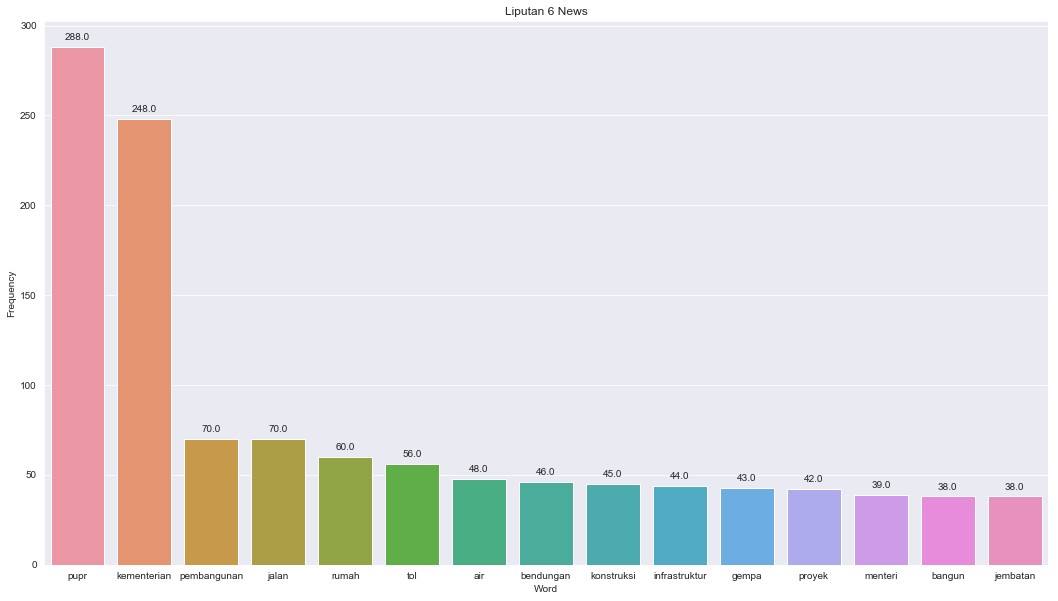

In [25]:
plt.figure(figsize=(18,10))
sns.set_style('darkgrid')
plt.title('Liputan 6 News')

ax = sns.barplot(x = 'Word', y = 'Frequency', data = rslt_tags.head(15))


rects = ax.patches

for rect in rects:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    
    space = 5
    
    va = 'bottom'
    
    label = '{:.1f}'.format(y_value)
    
    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(0, space),
        textcoords='offset points',
        ha = 'center',
        va=va)

In [27]:
from translate import Translator
translator= Translator(from_lang="id", to_lang="en")

In [29]:
bloblist_desc = list()


In [30]:
train_descr_str=train['newstitle'].astype(str)
for row in train_descr_str:
    an = translator.translate(row)
    blob = TextBlob(an)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    train_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])


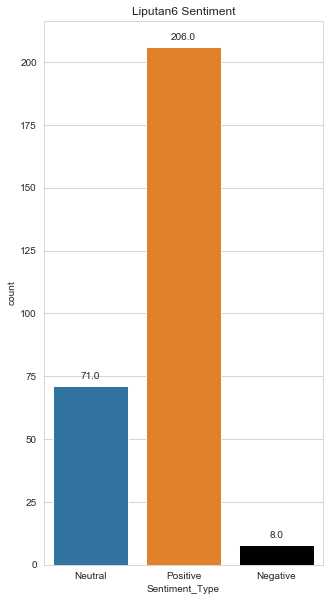

In [31]:
 
def f(train_polarity_desc):
    if train_polarity_desc['sentiment'] > 0:
        val = "Positive"
    elif train_polarity_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

train_polarity_desc['Sentiment_Type'] = train_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(5,10))
sns.set_style("whitegrid")
plt.title('Liputan6 Sentiment')
ax = sns.countplot(x="Sentiment_Type", data=train_polarity_desc, palette=["C0", "C1", "k"])

rects = ax.patches

for rect in rects:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    
    space = 5
    
    va = 'bottom'
    
    label = '{:.1f}'.format(y_value)
    
    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(0, space),
        textcoords='offset points',
        ha = 'center',
        va=va)


In [34]:
train_polarity_desc

,sentence,sentiment,polarity,Sentiment_Type
0,"Harga Rumah Subsidi Bakal Naik hingga 7,75 Persen",0.000000,0.000000,Neutral
1,"Diskon 15 Persen, Tarif Tol Trans Jawa Jakarta...",0.000000,1.000000,Neutral
2,Menteri Basuki Minta Warga Tak Buang Sampah di...,0.000000,0.000000,Neutral
3,"Mulai Penggenangan, Bendungan Mila Pasok Air k...",0.000000,0.100000,Neutral
4,17.500 Rumah MBR di Padang Nikmati Program Hib...,0.400000,0.500000,Positive
5,Pembangunan Jalan dan Jembatan Tumbuhkan Sentr...,0.168182,0.327273,Positive
6,Tol Medan-Kualanamu-Tebing Tinggi Seksi 7 Siap...,0.275000,0.525000,Positive
7,Kementerian PUPR Imbau Pemda Optimalkan Tempat...,0.000000,0.044444,Neutral
8,KPK Periksa 2 Saksi Terkait Kasus Suap Proyek ...,0.000000,0.000000,Neutral
9,Kementerian PUPR Rampungkan Ruas Jalan Jayapur...,0.000000,0.000000,Neutral
